In [70]:
import pandas as pd
import numpy as np
import scipy
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing  import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

import seaborn as sns
%matplotlib inline



In [170]:
games2000 = pd.read_csv("final/gamesFinal2000.csv")
games2001 = pd.read_csv("final/gamesFinal2001.csv")
games2002 = pd.read_csv("final/gamesFinal2002.csv")
games2003 = pd.read_csv("final/gamesFinal2002.csv")
games2004 = pd.read_csv("final/gamesFinal2004.csv")
games2005 = pd.read_csv("final/gamesFinal2005.csv")
games2006 = pd.read_csv("final/gamesFinal2005.csv")
games2007 = pd.read_csv("final/gamesFinal2005.csv")
games2008 = pd.read_csv("final/gamesFinal2005.csv")

In [171]:
def changeMinutesToSeconds(row):
    away = row["possession_time_away_team"].split(":")
    away_seconds = (int(away[0])*60)+int(away[1])
    
    home = row["possession_time_home_team"].split(":")
    home_seconds = (int(home[0])*60)+int(home[1])
    
    row["possession_time_away_team"] = away_seconds
    row["possession_time_home_team"] = home_seconds
    return row

games2000_time =  games2000.apply(changeMinutesToSeconds, axis=1)
games2001_time =  games2001.apply(changeMinutesToSeconds, axis=1)
games2002_time =  games2002.apply(changeMinutesToSeconds, axis=1)
games2003_time =  games2003.apply(changeMinutesToSeconds, axis=1)
games2004_time =  games2004.apply(changeMinutesToSeconds, axis=1)
games2005_time =  games2005.apply(changeMinutesToSeconds, axis=1)
games2006_time =  games2006.apply(changeMinutesToSeconds, axis=1)
games2007_time =  games2007.apply(changeMinutesToSeconds, axis=1)
games2008_time =  games2008.apply(changeMinutesToSeconds, axis=1)

In [172]:

games2000_clean = games2000_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2001_clean = games2001_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2002_clean = games2002_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2003_clean = games2003_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2004_clean = games2004_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2005_clean = games2005_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2006_clean = games2005_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2007_clean = games2005_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)
games2008_clean = games2005_time.drop(["market_home_team","market_away_team","index_away_team","index_home_team","Unnamed: 0","Unnamed: 0.1_away_team","Unnamed: 0.1_home_team", "Unnamed: 0_away_team","Unnamed: 0_home_team", "id_home_team", "id_away_team",
                                 "sr_id.1_home_team","reference.1_home_team","sr_id.1_away_team","reference.1_away_team", "sr_id_away_team", "sr_id_home_team",
                                 ], axis=1)

In [173]:
games_comp =  pd.concat([games2000_clean, games2001_clean, games2002_clean, games2003_clean, games2004_clean, games2005_clean, games2006_clean, games2007_clean, games2008_clean], axis=0, sort=False)
games_comp = games_comp.reset_index()

In [174]:
games_comp.columns


Index(['index', 'alias_away_team', 'alias_home_team', 'avg_gain_away_team',
       'avg_gain_home_team', 'fumbles_away_team', 'fumbles_home_team',
       'lost_fumbles_away_team', 'lost_fumbles_home_team', 'name_away_team',
       'name_home_team', 'penalties_away_team', 'penalties_home_team',
       'penalty_yards_away_team', 'penalty_yards_home_team',
       'play_count_away_team', 'play_count_home_team', 'points_away_team',
       'points_home_team', 'possession_time_away_team',
       'possession_time_home_team', 'reference_away_team',
       'reference_home_team', 'remaining_timeouts_away_team',
       'remaining_timeouts_home_team', 'return_yards_away_team',
       'return_yards_home_team', 'rush_plays_away_team',
       'rush_plays_home_team', 'safeties_away_team', 'safeties_home_team',
       'total_yards_away_team', 'total_yards_home_team', 'turnovers_away_team',
       'turnovers_home_team', 'used_timeouts_away_team',
       'used_timeouts_home_team', 'winner'],
      dtype='

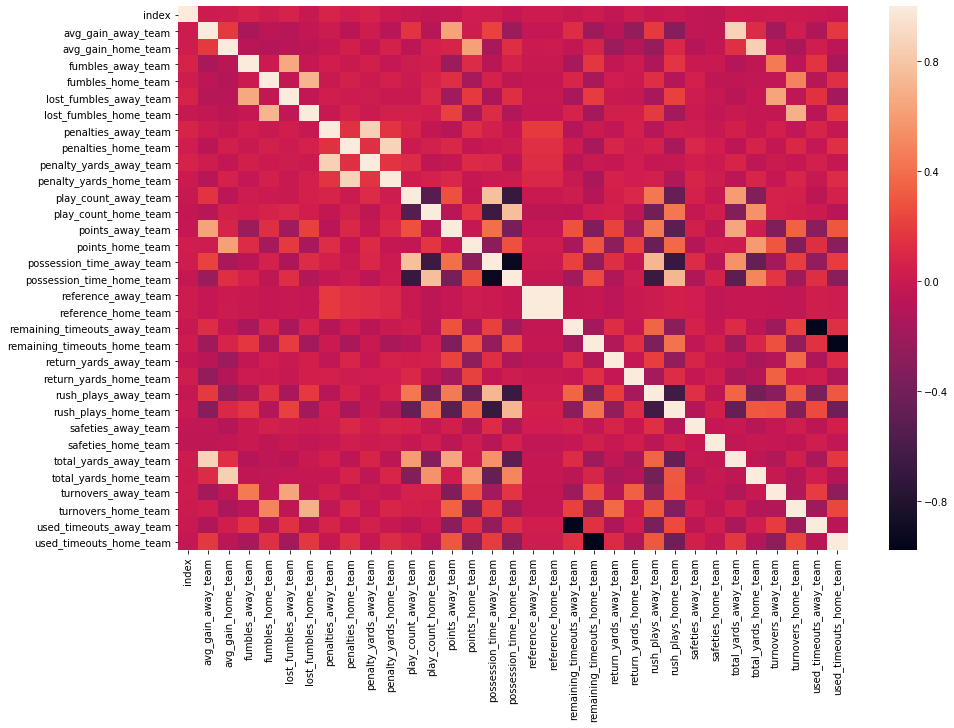

In [175]:
corr = games_comp.corr()

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [176]:
X = games_comp.drop(['index','name_home_team','name_away_team','play_count_away_team','fumbles_home_team','reference_away_team','reference_home_team','used_timeouts_home_team',"points_away_team","points_home_team",'return_yards_away_team','turnovers_home_team','rush_plays_away_team','possession_time_away_team',"winner"], axis=1)
X = pd.get_dummies(X, columns=['alias_away_team','alias_home_team'], drop_first=True)
y = games_comp["points_home_team"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [177]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train,y_train)

0.19237976264834478

In [178]:
accuracy_score(y_test,y_pred)

0.13828238719068414